In [1]:
import tensorflow as tf

In [2]:
help(tf.abs)

Help on function abs in module tensorflow.python.ops.math_ops:

abs(x, name=None)
    Computes the absolute value of a tensor.
    
    Given a tensor of integer or floating-point values, this operation returns a
    tensor of the same type, where each element contains the absolute value of the
    corresponding element in the input.
    
    Given a tensor `x` of complex numbers, this operation returns a tensor of type
    `float32` or `float64` that is the absolute value of each element in `x`. All
    elements in `x` must be complex numbers of the form \\(a + bj\\). The
    absolute value is computed as \\( \sqrt{a^2 + b^2}\\).  For example:
    ```python
    x = tf.constant([[-2.25 + 4.75j], [-3.25 + 5.75j]])
    tf.abs(x)  # [5.25594902, 6.60492229]
    ```
    
    Args:
      x: A `Tensor` or `SparseTensor` of type `float16`, `float32`, `float64`,
        `int32`, `int64`, `complex64` or `complex128`.
      name: A name for the operation (optional).
    
    Returns:
      A `Te

In [3]:
# initialize variables/model parameters
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

In [4]:
W

<tf.Variable 'weights:0' shape=(2, 1) dtype=float32_ref>

In [5]:
b

<tf.Variable 'bias:0' shape=() dtype=float32_ref>

In [6]:
def inference(X):
    return tf.matmul(X, W) + b

In [13]:
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))  ####Net Loss

In [7]:
def inputs():
    weight_age = [[84, 46], [73, 20], [65, 52], [70, 30], [76, 57], [69, 25], [63, 28], [72, 36], [79, 57], [75, 44], [27, 24], [89, 31], [65, 52], [57, 23], [59, 60], [69, 48], [60, 34], [79, 51], [75, 50], [82, 34], [59, 46], [67, 23], [85, 37], [55, 40], [63, 30]]
    blood_fat_content = [354, 190, 405, 263, 451, 302, 288, 385, 402, 365, 209, 290, 346, 254, 395, 434, 220, 374, 308, 220, 311, 181, 274, 303, 244]

    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

In [25]:

def train(total_loss):
    learning_rate = 0.0000001
    print(tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss))
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

In [9]:
def evaluate(sess, X, Y):
    print (sess.run(inference([[80., 25.]]))) # ~ 303
    print (sess.run(inference([[65., 25.]]))) # ~ 256

In [26]:
X,Y = inputs()

In [21]:
####On Iris Data Sepal Length vs Petal Width

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [70]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [71]:
iris = datasets.load_iris()

In [72]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
len(iris.target)

150

In [74]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [75]:
x_vals = np.array([x[3] for x in iris.data])

In [76]:
x_vals

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [77]:
y_vals = np.array([y[0] for y in iris.data])

In [78]:
y_vals

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [79]:
batch_size = 25

In [80]:

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [81]:
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [82]:
model_output = tf.add(tf.matmul(x_data, A), b)  ###y = A*x +b

In [83]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [84]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [85]:
my_opt = tf.train.GradientDescentOptimizer(0.05)

In [86]:
train_step = my_opt.minimize(loss)

In [87]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)  ###Random 25 indices
    rand_x = np.transpose([x_vals[rand_index]])   ###x_val corresponding to that indices
    rand_y = np.transpose([y_vals[rand_index]])   ###y_val corresponding to that indices
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[1.3653073]] b = [[4.087045]]
Loss = 0.32536864
Step #50 A = [[1.1657668]] b = [[4.3891196]]
Loss = 0.21862608
Step #75 A = [[1.0581279]] b = [[4.5278435]]
Loss = 0.30834275
Step #100 A = [[1.0038484]] b = [[4.6275697]]
Loss = 0.2246114


In [88]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

In [89]:
slope

array([1.0038484], dtype=float32)

In [90]:
y_intercept

array([4.6275697], dtype=float32)

In [91]:
# Get best fit line
best_fit = []
for i in x_vals:
    
    best_fit.append(slope*i+y_intercept) ###Predictions

In [102]:
(np.array(best_fit).T)   ###Predictions

array([[4.8283396, 4.8283396, 4.8283396, 4.8283396, 4.8283396, 5.029109 ,
        4.9287243, 4.8283396, 4.8283396, 4.7279544, 4.8283396, 4.8283396,
        4.7279544, 4.7279544, 4.8283396, 5.029109 , 5.029109 , 4.9287243,
        4.9287243, 4.9287243, 4.8283396, 5.029109 , 4.8283396, 5.1294937,
        4.8283396, 4.8283396, 5.029109 , 4.8283396, 4.8283396, 4.8283396,
        4.8283396, 5.029109 , 4.7279544, 4.8283396, 4.8283396, 4.8283396,
        4.8283396, 4.7279544, 4.8283396, 4.8283396, 4.9287243, 4.9287243,
        4.8283396, 5.229879 , 5.029109 , 4.9287243, 4.8283396, 4.8283396,
        4.8283396, 4.8283396, 6.0329576, 6.1333423, 6.1333423, 5.9325724,
        6.1333423, 5.9325724, 6.2337275, 5.631418 , 5.9325724, 6.0329576,
        5.631418 , 6.1333423, 5.631418 , 6.0329576, 5.9325724, 6.0329576,
        6.1333423, 5.631418 , 6.1333423, 5.731803 , 6.434497 , 5.9325724,
        6.1333423, 5.8321877, 5.9325724, 6.0329576, 6.0329576, 6.334112 ,
        6.1333423, 5.631418 , 5.731803

In [96]:
y_vals   ####True_values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

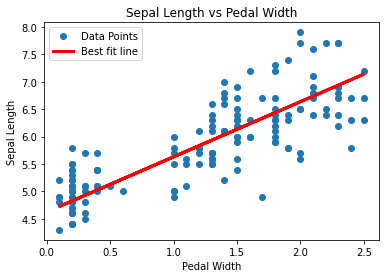

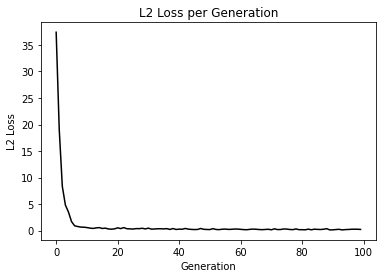

In [103]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()